# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [1]:
from scipy.stats import uniform
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

[2.86224048 2.34582818 2.98168876 2.22405901 2.81580682 2.2915217
 2.20092736 2.60099438 2.64890681 2.59780933]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

In [6]:
def randoms_generator(bottom, ceiling, count):
    a = uniform.rvs(size=count)
    return bottom + (ceiling-bottom) * a

In [70]:
# Case 1
a = randoms_generator(10,15,100)
# Case 2
b = randoms_generator(10,60,1000)

In [35]:
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

import pylab as p
import numpy as np
import pandas as pd

How are the two distributions different?

There distribution among the values is pretty similar in both cases. However, as in case 2 'N' is much bigger, so does the frequency counter. This is checkable when comparing both graphs, as sharing the 'y' axis creates the feeling of having a much smaller first graph.

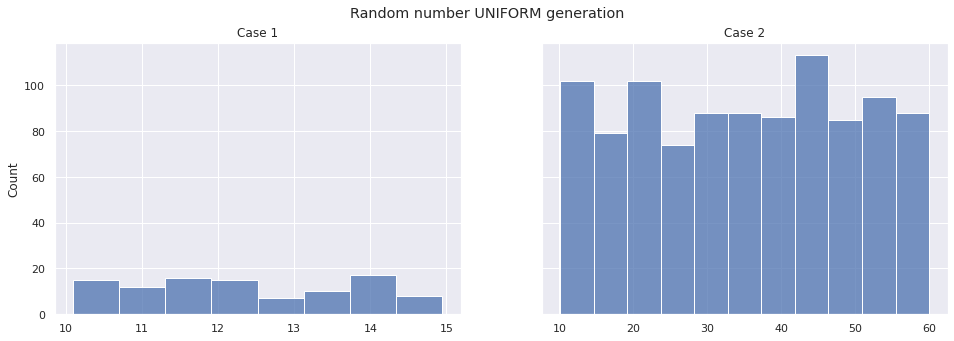

In [80]:
figs, axes = plt.subplots(1, 2, sharey = True, figsize=(16,5))
figs.suptitle('Random number UNIFORM generation')
axes[0].set_title('Case 1')
axes[1].set_title('Case 2')

sns.histplot(a, ax=axes[0]);
sns.histplot(b, ax=axes[1]);

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

In [85]:
from scipy.stats import norm

In [93]:
def rand_normal_generator(mean, sdt, amount):
    my_normal = norm(loc=mean, scale=sdt)
    sample = my_normal.rvs(amount)
    return sample

In [94]:
# Case 3
c = rand_normal_generator(10,1,1000)
# Case 4
d = rand_normal_generator(10,50,1000)

How are the two distributions different?

The main difference is that the variance in case 4 is much larger, so the range of values goes even until negative numbers.

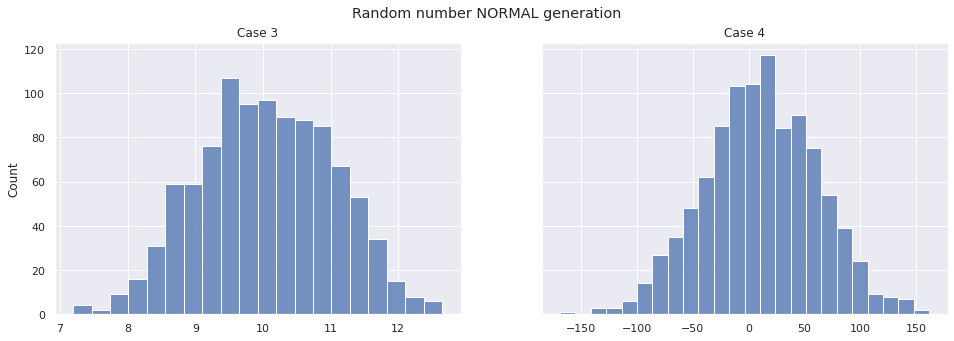

In [96]:
figs, axes = plt.subplots(1, 2, sharey = True, figsize=(16,5))
figs.suptitle('Random number NORMAL generation')
axes[0].set_title('Case 3')
axes[1].set_title('Case 4')

sns.histplot(c, ax=axes[0]);
sns.histplot(d, ax=axes[1]);

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

In [100]:
vehicles=pd.read_csv('vehicles.csv')
vehicles.columns

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='object')

First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

In [120]:
print(vehicles['Fuel Barrels/Year'].mean())
print(vehicles['Fuel Barrels/Year'].median())

17.609055502328875
17.347894736842107


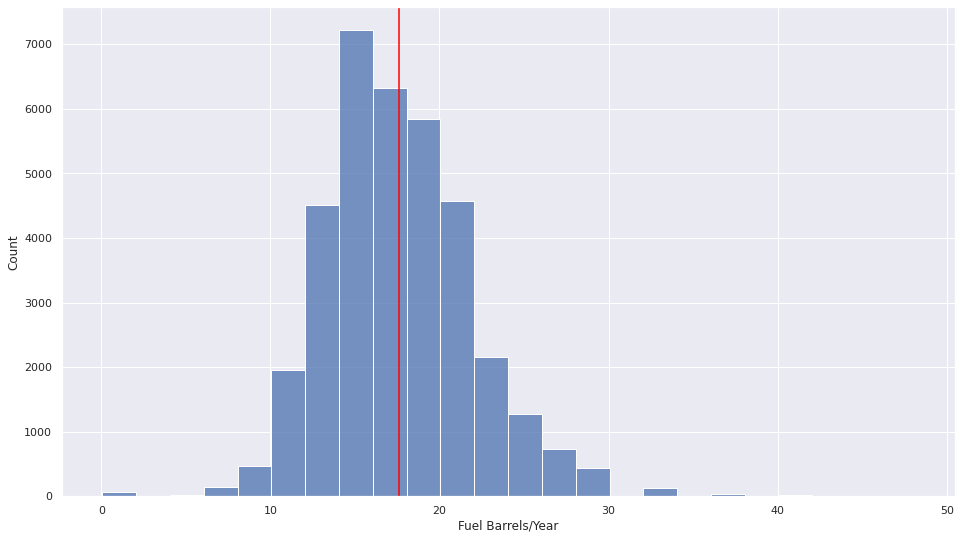

In [117]:
plt.axvline(x=vehicles['Fuel Barrels/Year'].mean(),color='red')
sns.histplot(data=vehicles, x='Fuel Barrels/Year', bins='auto', binwidth=2);

2. CO2 Emission Grams/Mile 

In [122]:
print(vehicles['CO2 Emission Grams/Mile'].mean())
print(vehicles['CO2 Emission Grams/Mile'].median())

475.31633925715045
467.7368421052632


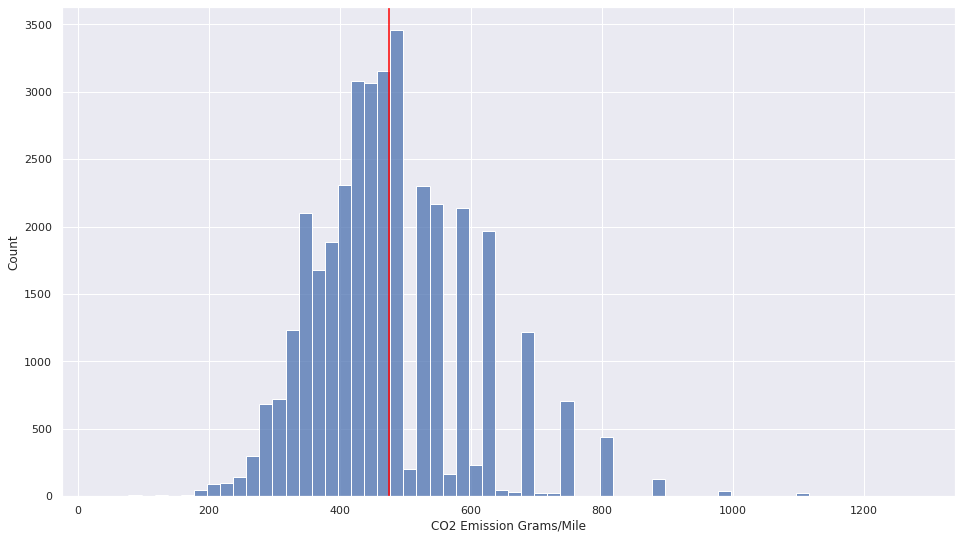

In [118]:
plt.axvline(x=vehicles['CO2 Emission Grams/Mile'].mean(),color='red')
sns.histplot(data=vehicles, x='CO2 Emission Grams/Mile', bins='auto', binwidth=20);

3. Combined MPG

In [121]:
print(vehicles['Combined MPG'].mean())
print(vehicles['Combined MPG'].median())

19.92932242990654
19.0


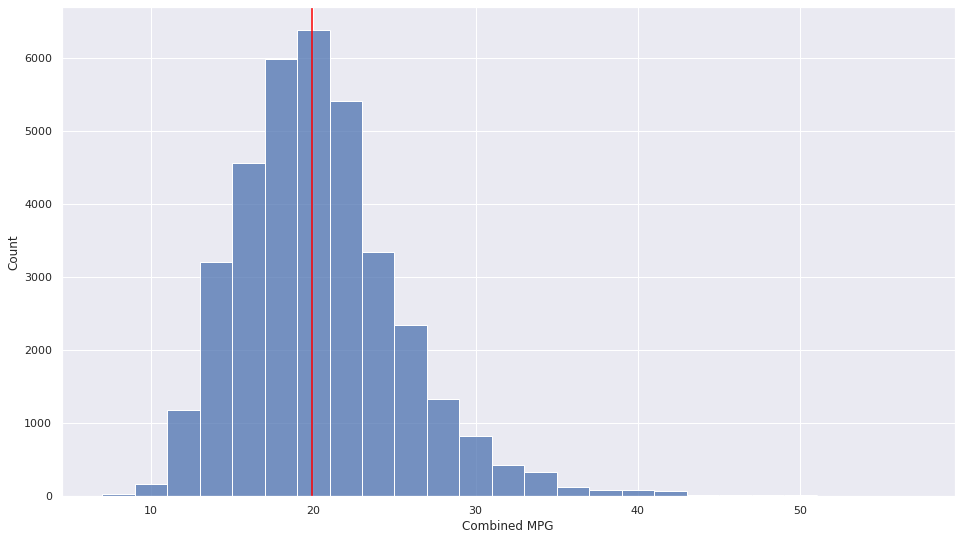

In [119]:
plt.axvline(x=vehicles['Combined MPG'].mean(),color='red')
sns.histplot(data=vehicles, x='Combined MPG', bins='auto', binwidth=2);

Which one(s) of the variables are nearly normally distributed? How do you know?

The 'Fuel Barrels/Year' and the 'Combined MP' are nearly normally distributed, as their mean and median are very close.

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with the size of 10 and 100.

1. Plot the distributions as histograms with the nubmer of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

In [136]:
from scipy.stats import expon

In [149]:
def rand_exponential_generator(mean,s):
    return np.random.exponential(scale=mean,size=s)

In [150]:
# Case 5
e = rand_exponential_generator(10, 10)
# Case 6
f = rand_exponential_generator(10, 100)

In [181]:
# number of bins = (max−min)/h --> Freedman-Diaconis rule
# h = (max - min) / 100
e_max = max(e)
e_min = min(e)
f_max = max(f)
f_min = min(f)

h_e = (e_max - e_min) / 100
h_f = (f_max - f_min) / 100

print(h_e)
print(h_f)

0.09235288148386629
0.3374831405585483


How are the two distributions different?

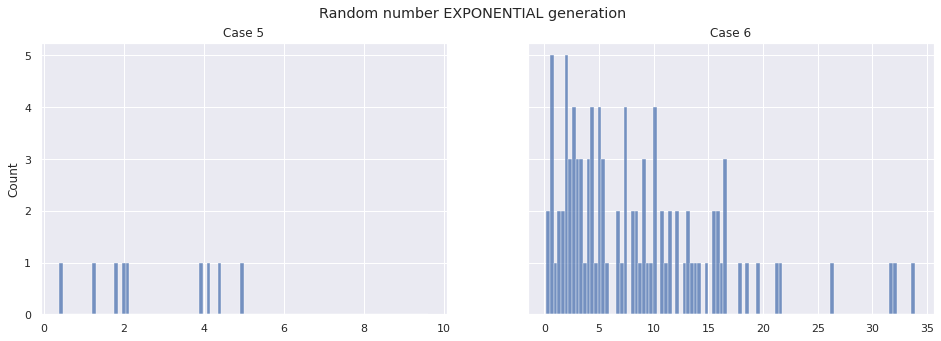

In [184]:
figs, axes = plt.subplots(1, 2, sharey = True, figsize=(16,5))
figs.suptitle('Random number EXPONENTIAL generation')
axes[0].set_title('Case 5')
axes[1].set_title('Case 6')

sns.histplot(e, binwidth=h_e, ax=axes[0]);
sns.histplot(f, binwidth=h_f, ax=axes[1]);

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [156]:
# Hint: This is same as saying P(x<15)
result1 = expon(scale=10)
result1.cdf(15)

0.7768698398515702

What is the probability that the customer will spend more than 15 minutes

In [159]:
1 - result1.cdf(15)

0.2231301601484298